# Homework 5: Training Linear Models

In [302]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular, cholesky, svd, diagsvd
from scipy.optimize import newton
from random import randint

To do this homework, you will need to look up the documentation of the scipy functions solve_triangular, cholesky, svd, diagsvd, and newton.

In [303]:
x = np.linspace(-10,10,100).reshape(-1,1)

In [304]:
y = 0.1 * x**4 + 1.2 * x**3 + 1.2 * x**2 + 2.1 * x 

In this homework, your training data is composed of features x and target y, which can be scattered on a plot as follows:

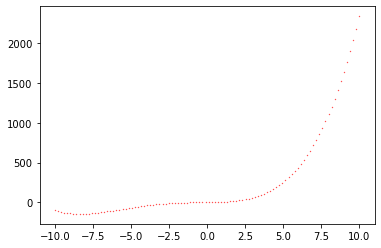

In [305]:
plt.scatter(x,y,color='r',s=0.1)

## Part 0: Setup

**Question 1:** You will train a linear model. Since the training data is not linear, we will need to project our features into a higher dimentional space. Define the linear regression model as a function of both its weights (w) and a projection (f). The model should be a function of x, where x is a value from the feature space (this can be done in one line of code if you use a lambda).

In [306]:
def model(w,f):
    return lambda x: np.dot(f(x), w) 

**Question 2:** Define the projection. It takes a value x from the feature space as an input, and returns an array of features. Note that you should define this function in such  a way that if you call it with an array of features, it should work and return a matrix of projected features.

In [307]:
def f(x):
    features = []
    for i in x:
        xi = i[0]
        proj = [xi,xi**2,xi**3,xi**4]
        features.append(proj)
    if len(x)==1:
        features = features[0]
    return features

The following function takes some training data x and y, a projection f, and a solver (the solver takes as an argument the features and the target and returns weights) and does the following:
<ul>
<li> Compute the projection of the features
<li> Use the solver to compute the weights based on the engineered training data
<li> Chose the predictive model based on the weights
<li> Scatter the training data
<li> Plot the prediction of our model 
</ul>
Please study this function carefuly. In the rest of this homework, you will define several solvers.

In [308]:
def fit(x,y,f,solver):
    X = f(x)
    #print(X[0:3])
    #print(np.array(X).shape)
    w = solver(X,y)
    chosen_model = model(w,f)
    plt.scatter(x,y,color='r',s=1.0)
    plt.plot(x,chosen_model(x))

## Part 1: Solving Least Squares with Linear Algebra

**Question 4:** Use the Cholesky decomposition to solve the normal equation. To do this you should make use of the scipy functions *cholesky* and *solve_triangular*.

In [309]:
def solve_cholesky(X,y):
    Xtx = np.dot(np.transpose(X), X)
    L = cholesky(Xtx, lower=True)
    Xty = np.dot(np.transpose(X),y)
    a = solve_triangular(L, Xty, lower=True)
    w = solve_triangular(np.transpose(L), a, lower=True)
    return w

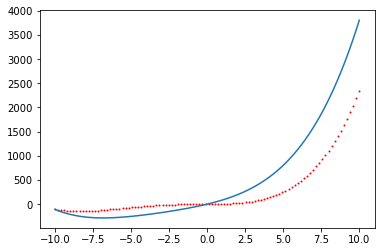

In [310]:
fit(x,y,f,solve_cholesky)

**Question 5:** Use the Singular Value decomposition to solve the normal equation. To do this you should make use of the scipy functions *svd* and *diagsvd*.

In [311]:
def solve_svd(X,y):
    U, s, Vh = svd(X)
    S = diagsvd(s, 100, 4)
    x = U.dot(S).dot(Vh)
    Xtx = np.dot(np.transpose(x), x)
    Xty = np.dot(np.transpose(x), y)
    w = solve_triangular(Xtx, Xty, lower=True)
    return w

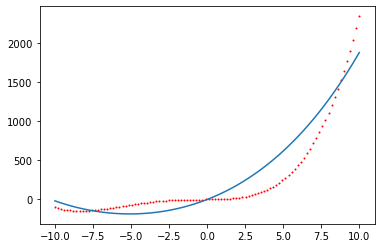

In [312]:
fit(x,y,f,solve_svd)

## Part 2: Solving Least Squares with Root Finding

**Question 6:** Define the gradient of your model.

In [315]:
def gradient(X,y,w):
    grad = 2 * np.transpose(X).dot(X).dot(w) - 2 * np.transpose(X).dot(y)
    return grad

**Question 7:** Use the Newton method to solve the normal equation. To do this, you should make use of the scipy function *newton*.

In [360]:
def solve_newton(X,y):
    k = newton(f, X)
    n = randint(0,len(k))
    w = k[n].reshape((4,1))
    while True:
        grad = gradient(X,y,w)
        grad_diff = np.mean(grad[0]) - np.mean(grad[1])
        if grad_diff < 0.001:
            break
        else:
            w -= np.dot(grad, [0.01,0.01,0.01,0.1])
    return grad

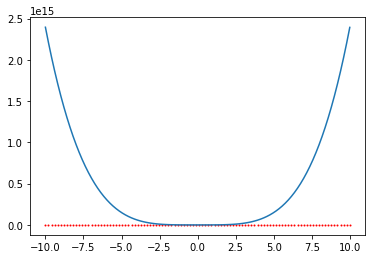

In [361]:
fit(x,y,f,solve_newton)

## Part 3: Solving Least Squares by Optimization

**Question 8:** Use Gradient Descent to solve the normal equation

In [356]:
def solve_gd(X,y):
    w = rand(4).reshape((4,1))
    while True:
        grad = gradient(X, y, w)
        grad_diff = np.mean(grad[0]) - np.mean(grad[1])
        if grad_diff < 1:
            break
        else:
            w -= np.dot(grad, [0.01,0.01,0.01,0.1])
    return w

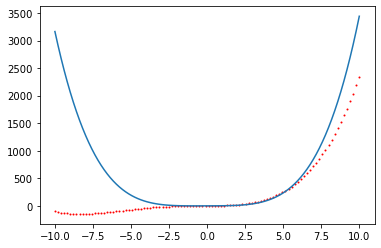

In [357]:
fit(x,y,f,solve_gd)

**Question 9:** Use Stochastic Gradient Descent to solve the normal equation

In [358]:
def solve_sgd(X,y):
    w = rand(4).reshape((4,1))
    while True:
        grad = gradient(X, y, w)
        grad_diff = np.mean(grad[0]) - np.mean(grad[1])
        if grad_diff < 1:
            break
        else:
            w -= np.dot(grad, [0.01,0.01,0.01,0.1])
    return w

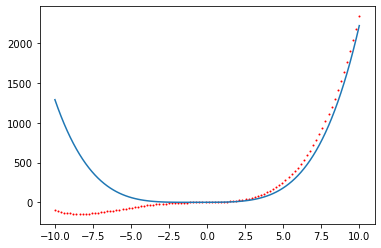

In [359]:
fit(x,y,f,solve_sgd)